In [ ]:
## 単変量特徴量の使用

-

### データの読み込み

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("./2019-summer-match-data-OraclesElixir-2019-11-10.xlsx", engine='openpyxl')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 98 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameid                   1428 non-null   int64  
 1   url                      1428 non-null   object 
 2   league                   1428 non-null   object 
 3   split                    1428 non-null   object 
 4   date                     1428 non-null   float64
 5   week                     1428 non-null   object 
 6   game                     1428 non-null   object 
 7   patchno                  1428 non-null   float64
 8   playerid                 1428 non-null   int64  
 9   side                     1428 non-null   object 
 10  position                 1428 non-null   object 
 11  player                   1428 non-null   object 
 12  team                     1428 non-null   object 
 13  champion                 1428 non-null   object 
 14  ban1                    

In [3]:
df.head()

,gameid,url,league,split,date,week,game,patchno,playerid,side,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,1,Blue,...,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,2,Blue,...,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,3,Blue,...,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,4,Blue,...,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,5,Blue,...,-1156,2731,2376,355,4,3,1,6,5,1


In [4]:
# DataFrameよりdtype=objectを削除
df = df.select_dtypes(include=['int64', 'float64'])
df.head()

,gameid,date,patchno,playerid,gamelength,result,k,d,a,teamkills,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,43740.286146,9.19,1,26.533333,0,0,4,4,7,...,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,43740.286146,9.19,2,26.533333,0,1,4,5,7,...,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,43740.286146,9.19,3,26.533333,0,1,5,6,7,...,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,43740.286146,9.19,4,26.533333,0,3,4,1,7,...,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,43740.286146,9.19,5,26.533333,0,2,5,2,7,...,-1156,2731,2376,355,4,3,1,6,5,1


In [5]:

target = df['result']
data = df.drop(['result', 'heraldtime', 'gameid', 'date', 'fbaron', 'fbarontime'], axis=1)

# 欠損値の抽出
# print(data.loc[:, data.isnull().any()])

# 欠損値の有無の確認
print(data.isnull().values.sum())


0


In [7]:
# 単変量統計
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0, test_size=.5)

# SelectPercentileを使用して特徴量を半分に
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# 訓練セットを変換
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (714, 69)
X_train_selected.shape: (714, 34)


[False False False  True  True  True  True  True False False False False
  True  True False  True False  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
 False  True False False False False False False False False  True False
  True False False False  True False False False  True False False  True
 False False  True False False False False False  True]


Text(0.5, 0, 'Sample index')

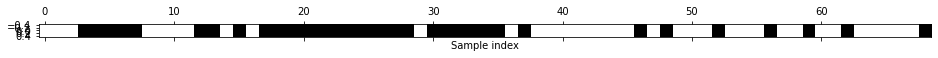

In [8]:
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample index')

In [9]:
from sklearn.linear_model import LogisticRegression

# テストデータの変換
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.846
Score with only selected features: 0.962


Text(0.5, 0, 'Sample index')

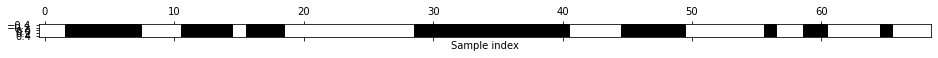

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=34)

select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [11]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.856
Test score: 1.000
